In [6]:
import fireducks.pandas as pd
import geopandas as gpd
from shapely.geometry import Point, box
import matplotlib.pyplot as plt

In [7]:
# Load geospatial data using Geopandas
gdf = gpd.read_file('extracted_folder/India Shape/india_ds.shp')

# Convert to FireDucks DataFrame
fdf = pd.from_pandas(gdf)


In [8]:
type(gdf)


geopandas.geodataframe.GeoDataFrame

In [9]:
fdf

,DST_ID,DISTRICT,STATE,geometry
0,1,Gilgit,JAMMU AND KASHMIR,"POLYGON ((74.30254 35.65012, 73.84581 35.82461..."
1,2,Kargil,JAMMU AND KASHMIR,"POLYGON ((74.8989 35.62939, 75.04768 35.77413,..."
2,3,Ladakh,JAMMU AND KASHMIR,"POLYGON ((75.98059 35.93823, 76.16165 35.91142..."
3,4,Chilas,JAMMU AND KASHMIR,"POLYGON ((73.27244 35.81596, 73.3261 35.79237,..."
4,5,Kupwara,JAMMU AND KASHMIR,"POLYGON ((74.30254 35.65012, 74.54015 35.50695..."
...,...,...,...,...
477,478,Nicobars,ANDAMAN AND NICOBAR ISLANDS,"POLYGON ((92.97154 9.11267, 92.88269 9.14972, ..."
478,479,Kollam,KERALA,"POLYGON ((76.41956 9.07524, 76.46352 9.10425, ..."
479,480,Thiruvananthapuram,KERALA,"POLYGON ((76.61252 8.73015, 76.7248 8.78969, 7..."
480,481,Kanniyakumari,TAMIL NADU,"POLYGON ((77.07748 8.18467, 77.14857 8.39516, ..."


In [10]:
# Define a bounding box for the region of interest
minx, miny, maxx, maxy = -74.25909, 40.477399, -73.700272, 40.916178

# Define the bounding box using Shapely
bbox = box(minx, miny, maxx, maxy)

# Convert back to GeoPandas for geometry-based operations
gdf_back = fdf.to_pandas()

# Perform spatial filtering using GeoPandas
cities_in_region = gdf_back[gdf_back['geometry'].intersects(bbox)]


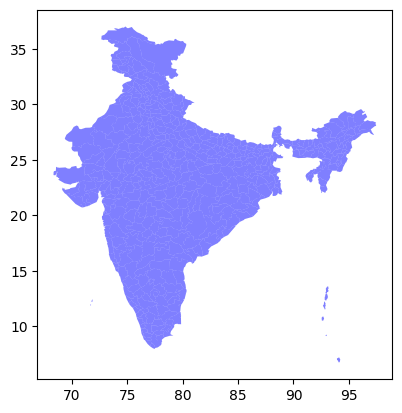

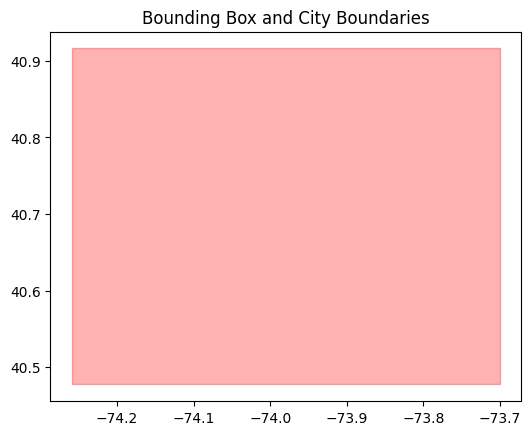

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plot the bounding box and city data
gdf.plot(color='blue', alpha=0.5)
gpd.GeoSeries(bbox).plot(color='red', alpha=0.3, edgecolor='red')
plt.title('Bounding Box and City Boundaries')
plt.show()


In [23]:
import time

# Benchmark using GeoPandas
start_time = time.time()
cities_in_region_gpd = gdf[gdf['geometry'].intersects(bbox)]
gpd_time = time.time() - start_time
print(f"GeoPandas Execution Time: {gpd_time} seconds")

# Benchmark using FireDucks
start_time = time.time()
cities_in_region_fd = fdf[fdf.intersects(bbox)]
fd_time = time.time() - start_time
print(f"FireDucks Execution Time: {fd_time} seconds")


GeoPandas Execution Time: 0.00083160400390625 seconds
FireDucks Execution Time: 0.0006716251373291016 seconds


In [21]:
import sys

gpd_memory = sys.getsizeof(gdf)
fd_memory = sys.getsizeof(fdf)
print("GeoPandas Memory:",gpd_memory)
print("FireDucks Memory:", fd_memory)


GeoPandas Memory: 64065
FireDucks Memory: 48


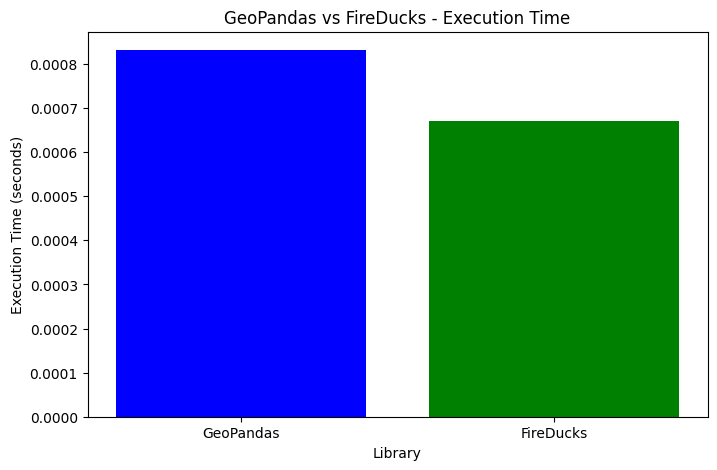

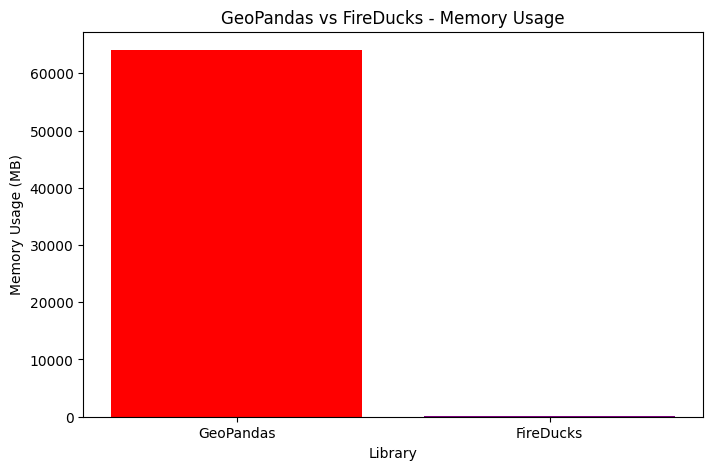

In [24]:
import matplotlib.pyplot as plt



# Execution Time Comparison
plt.figure(figsize=(8, 5))
plt.bar(['GeoPandas', 'FireDucks'], [gpd_time, fd_time], color=['blue', 'green'])
plt.xlabel('Library')
plt.ylabel('Execution Time (seconds)')
plt.title('GeoPandas vs FireDucks - Execution Time')
plt.savefig('execution_time_comparison.png')
plt.show()

# Memory Usage Comparison
plt.figure(figsize=(8, 5))
plt.bar(['GeoPandas', 'FireDucks'], [gpd_memory, fd_memory], color=['red', 'purple'])
plt.xlabel('Library')
plt.ylabel('Memory Usage (MB)')
plt.title('GeoPandas vs FireDucks - Memory Usage')
plt.savefig('memory_usage_comparison.png')
plt.show()


/tmp/ipykernel_1148/4264502934.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6, 4))


GIFs generated successfully!


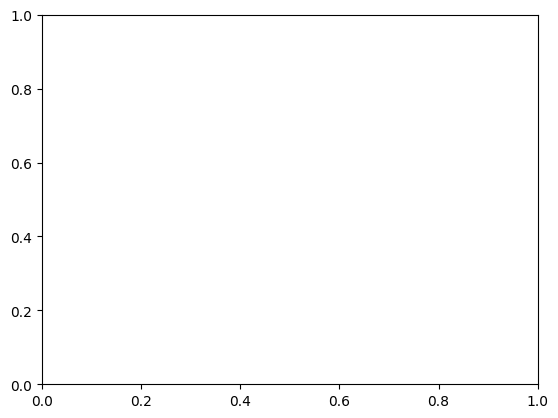

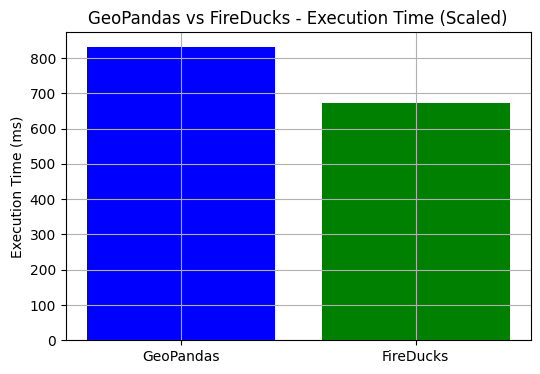

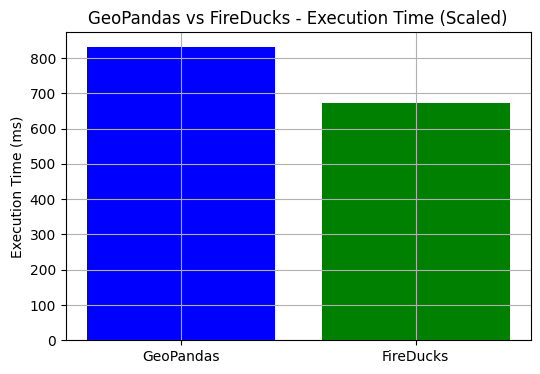

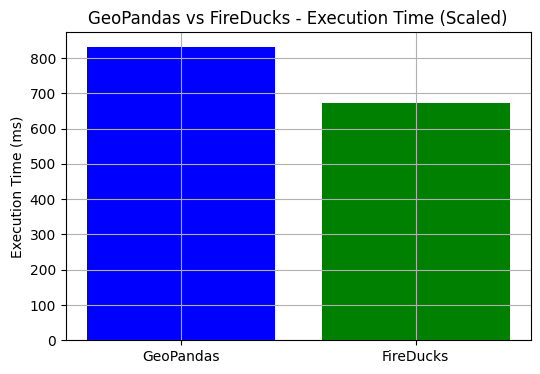

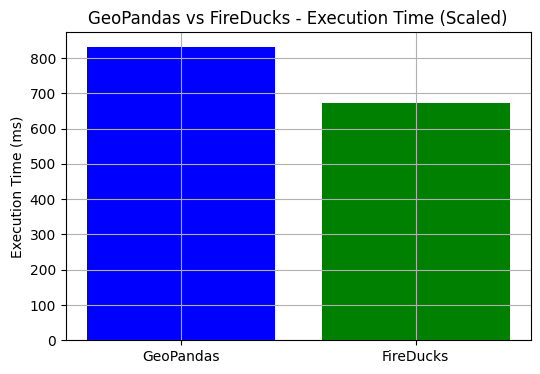

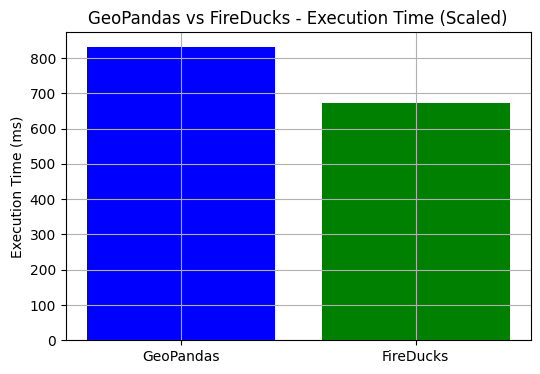

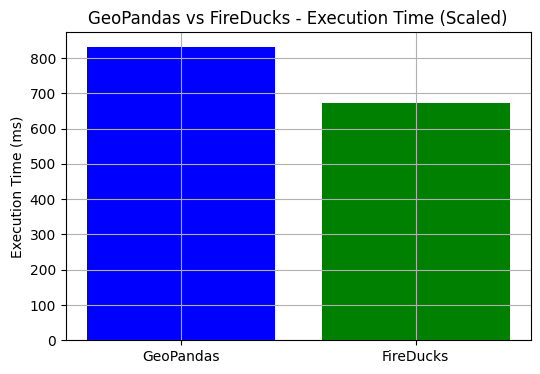

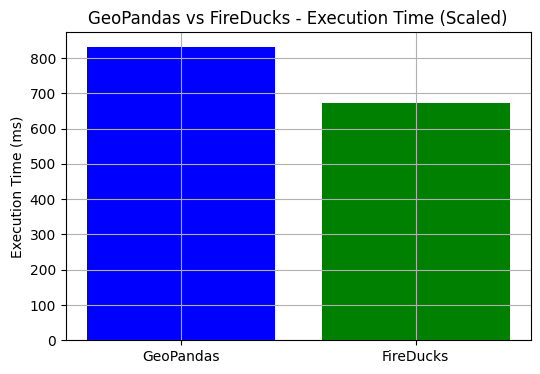

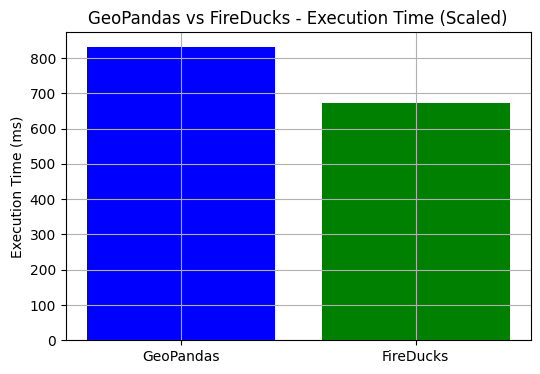

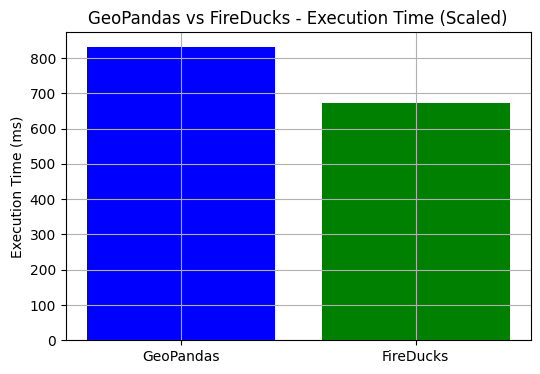

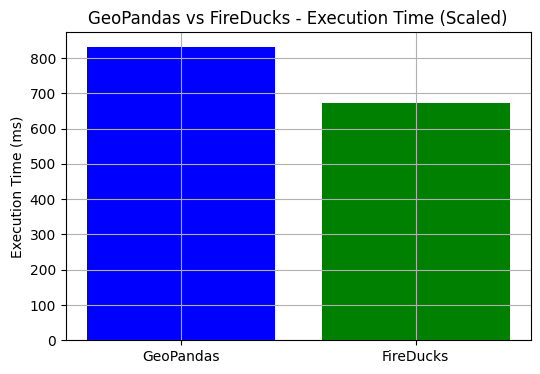

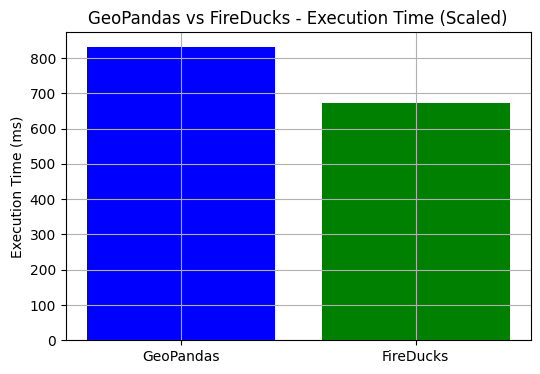

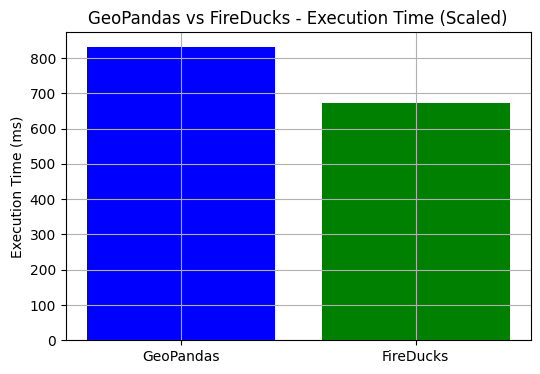

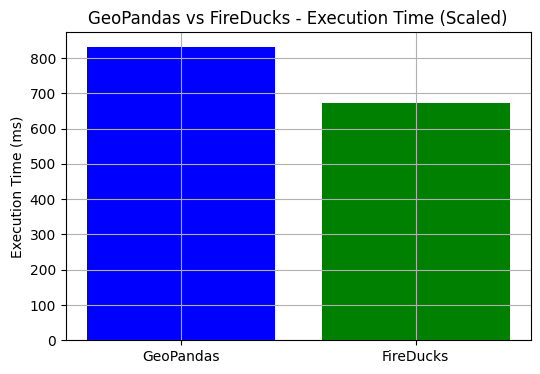

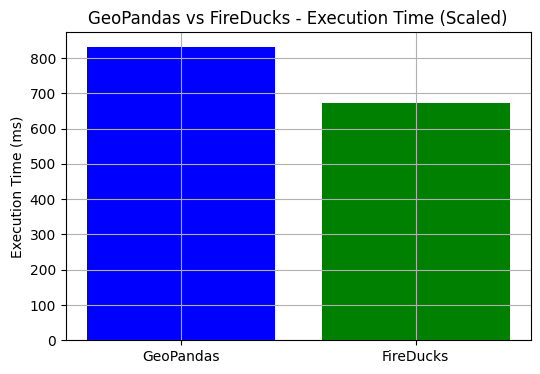

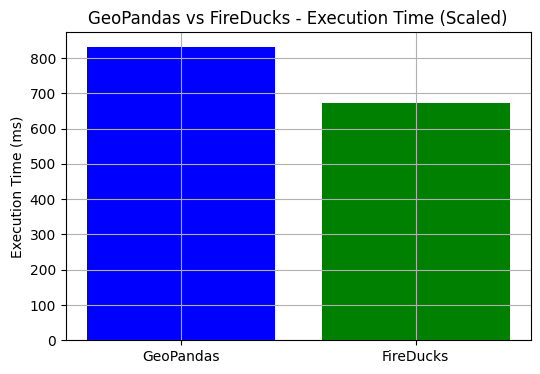

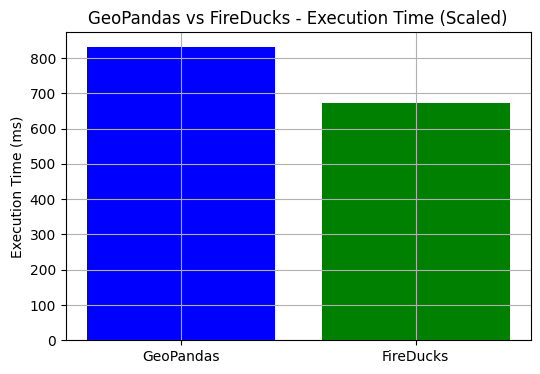

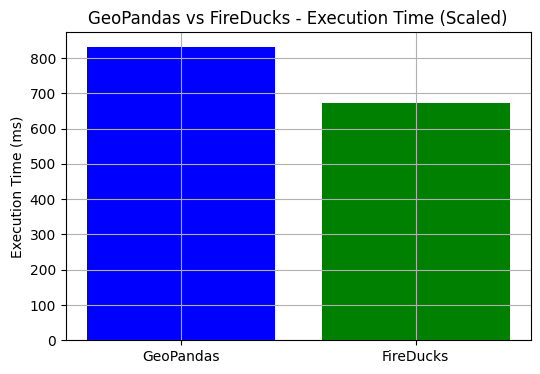

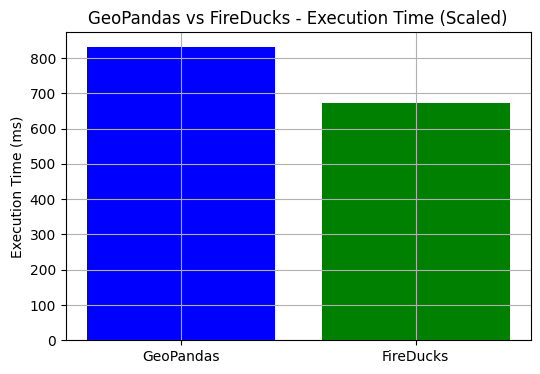

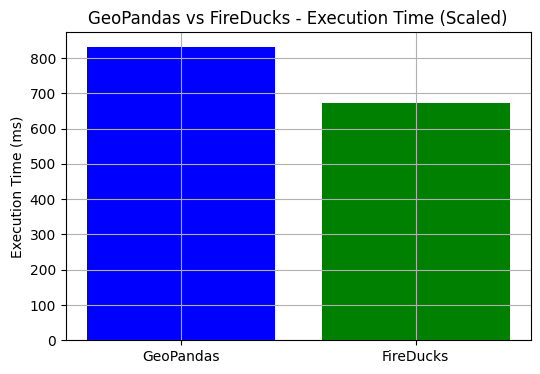

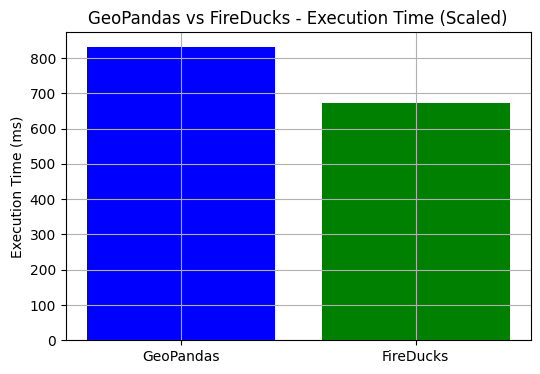

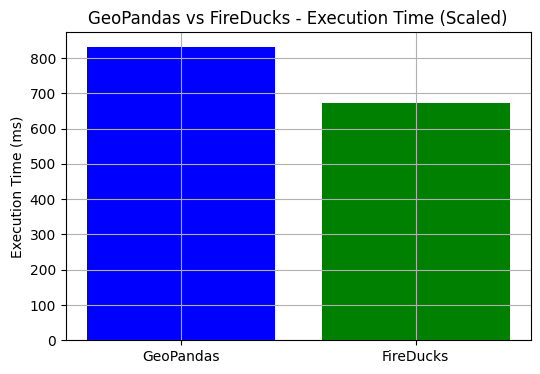

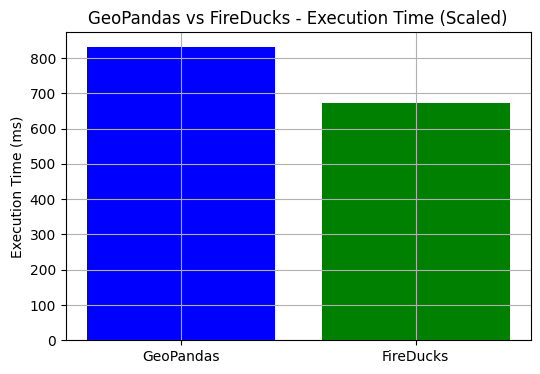

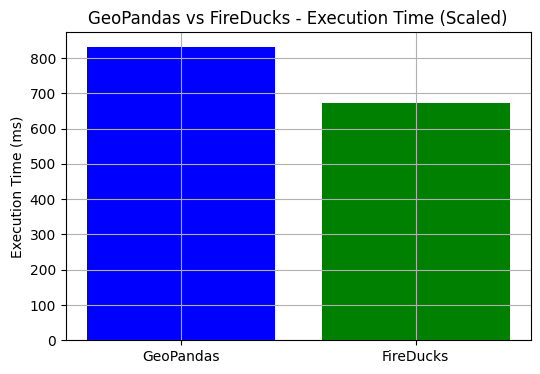

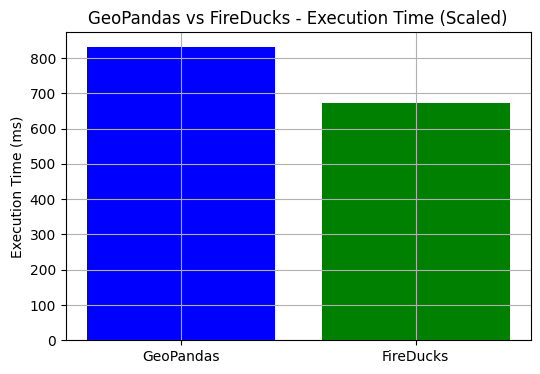

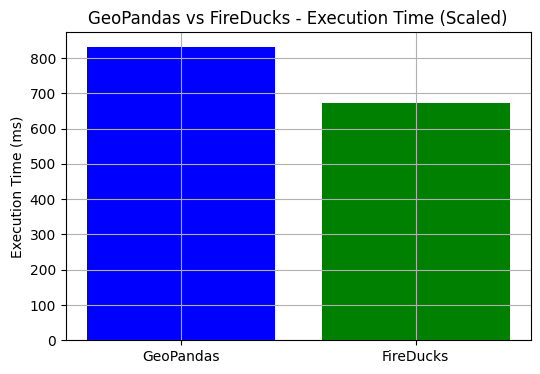

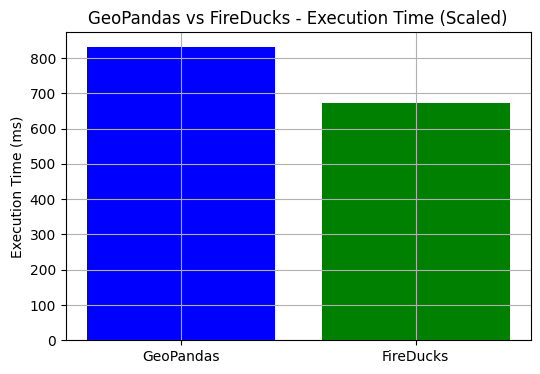

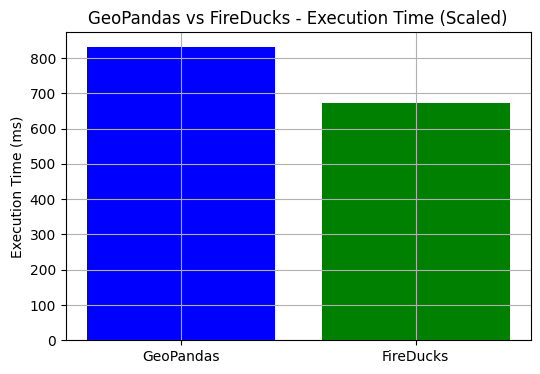

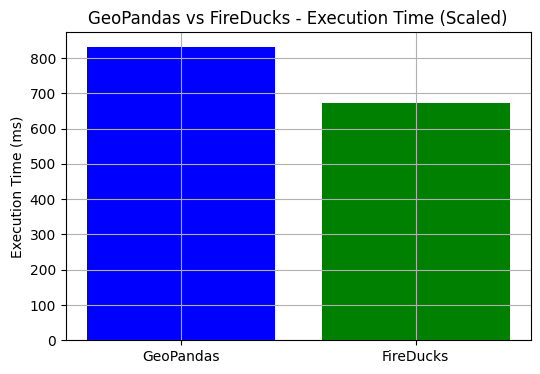

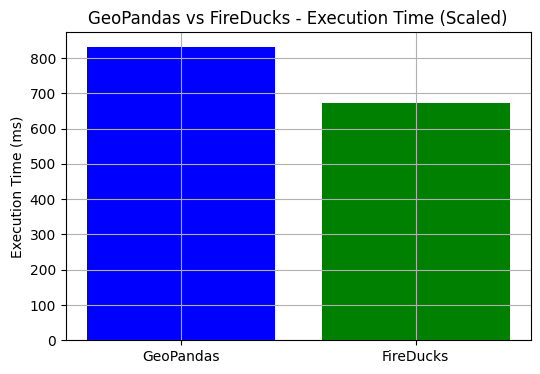

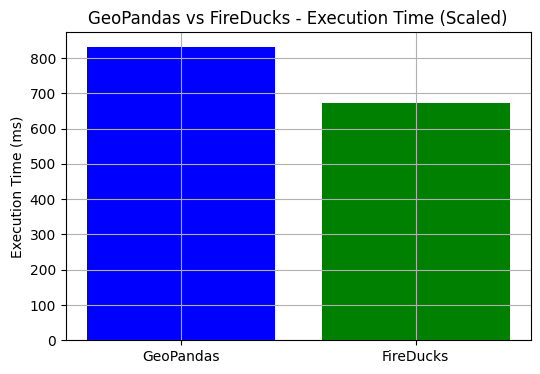

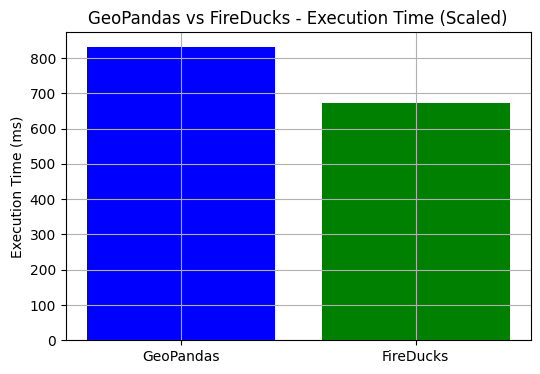

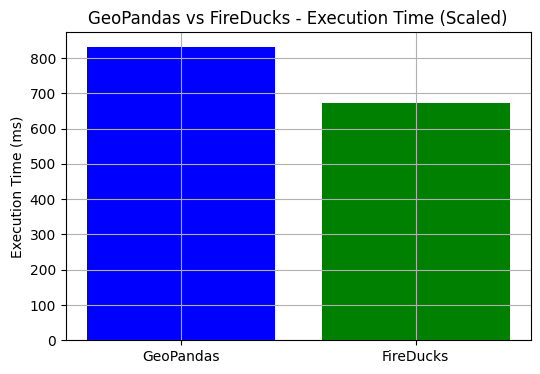

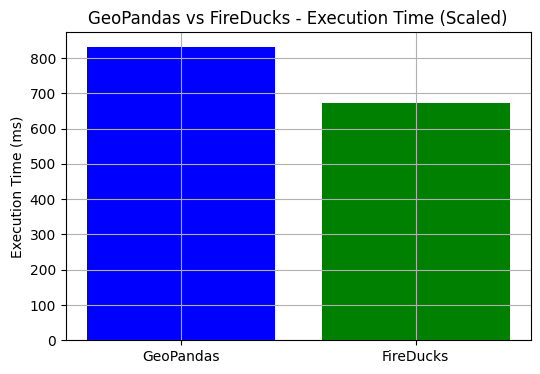

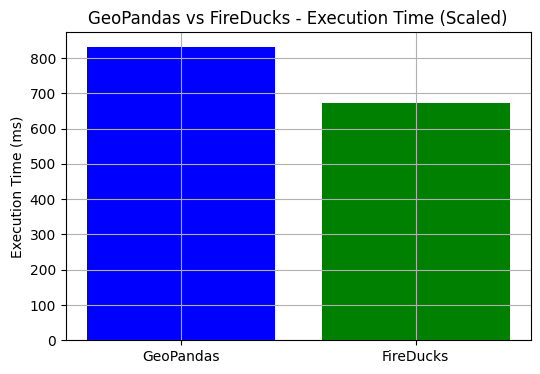

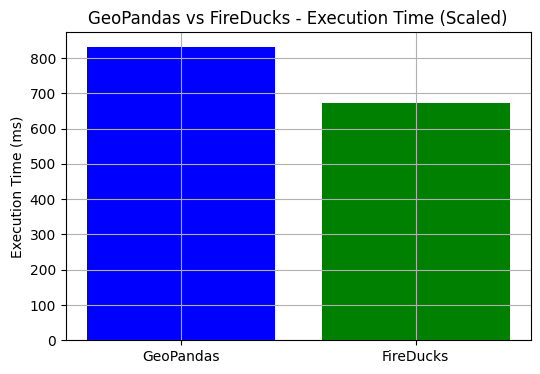

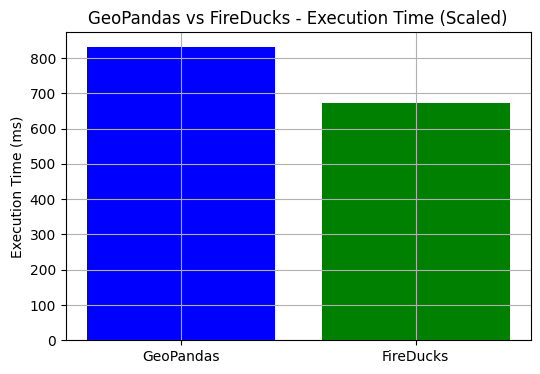

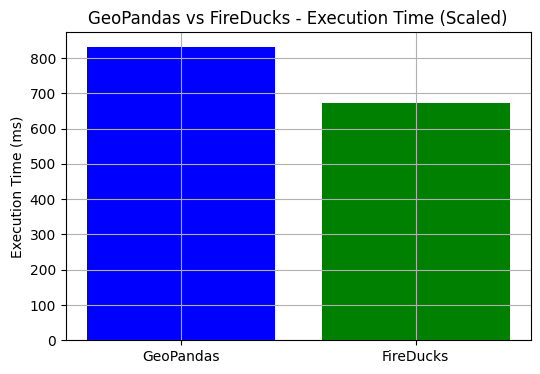

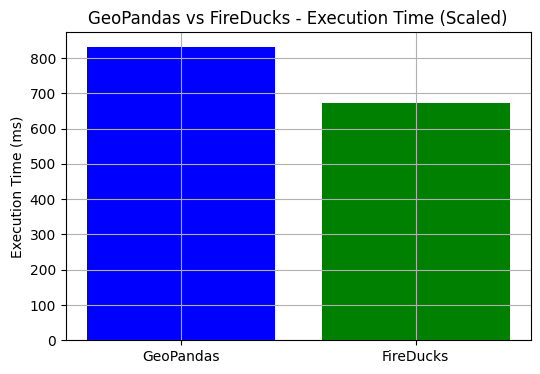

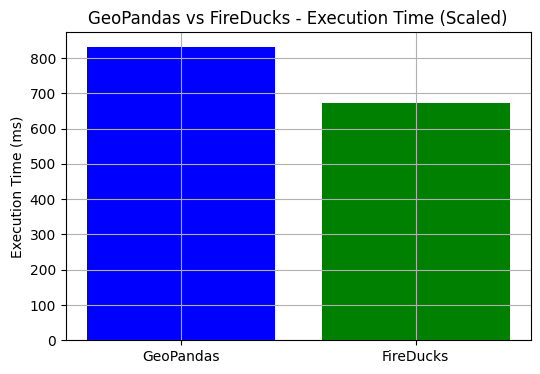

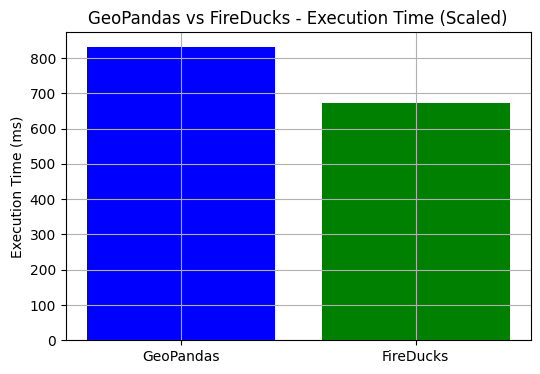

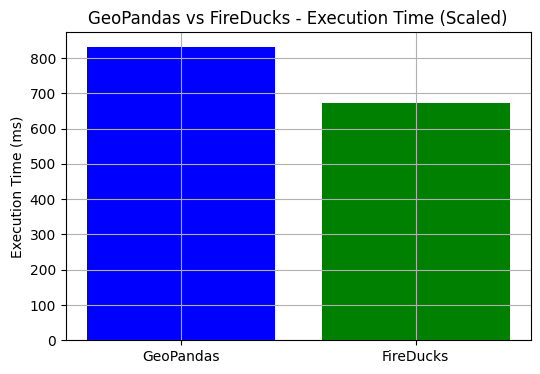

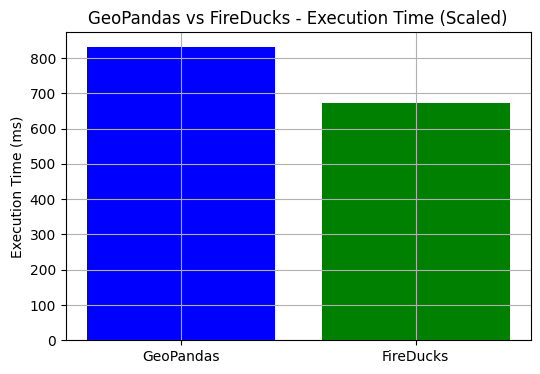

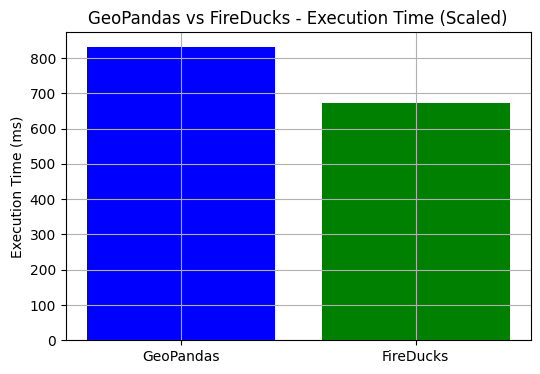

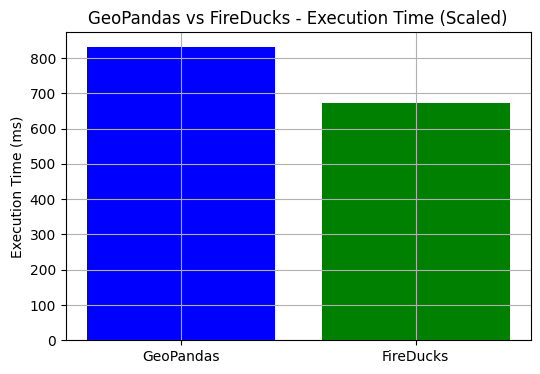

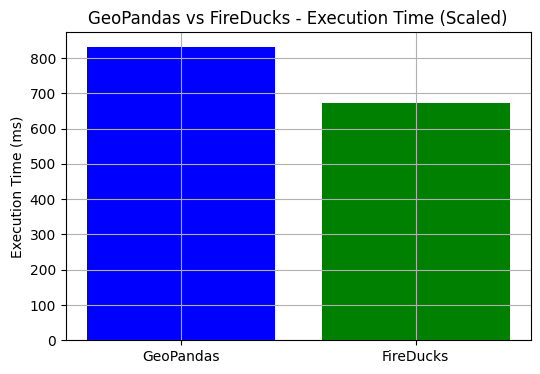

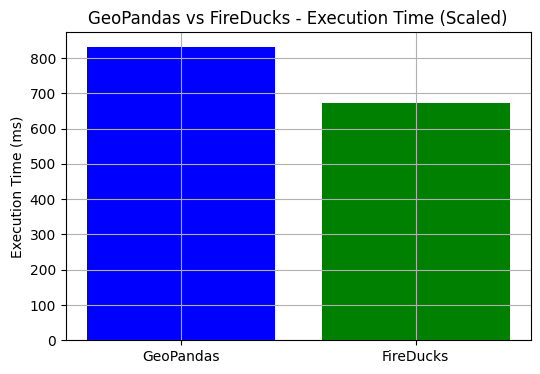

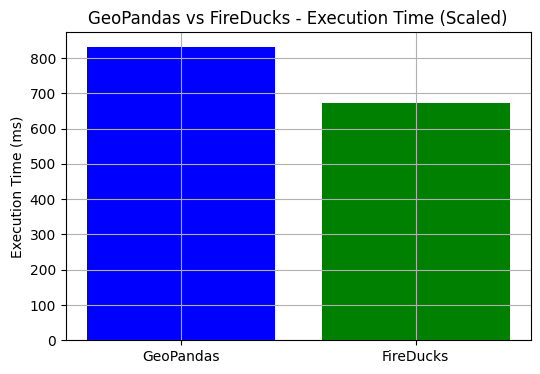

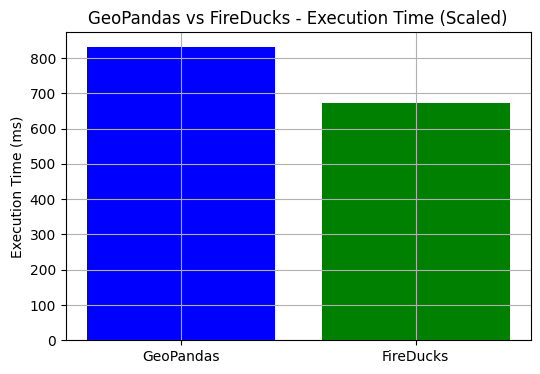

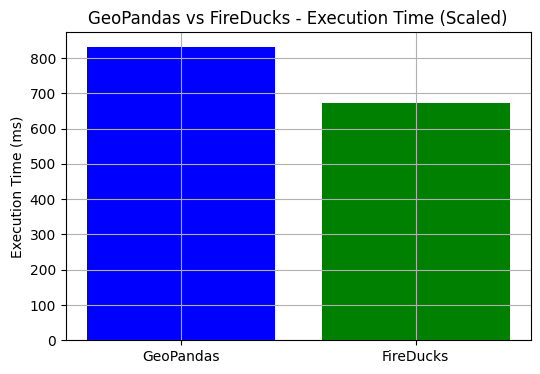

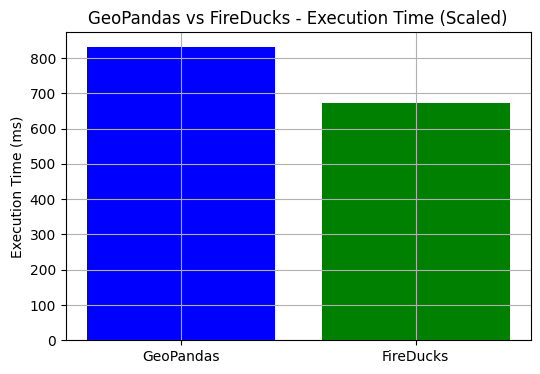

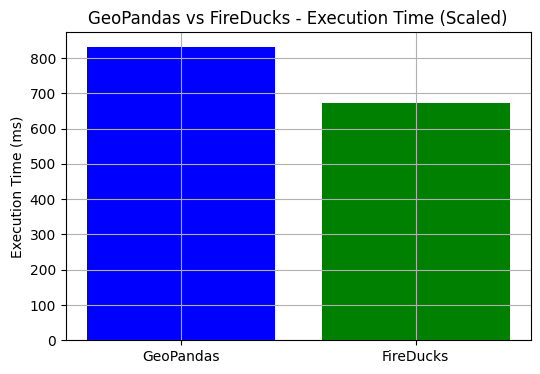

In [28]:
 # Example, replace with actual memory

print("GeoPandas Time:", gpd_time)
print("FireDucks Time:", fd_time)
print("GeoPandas Memory:", gpd_memory)
print("FireDucks Memory:", fd_memory)


GeoPandas Time: 0.00083160400390625
FireDucks Time: 0.0006716251373291016
GeoPandas Memory: 64065
FireDucks Memory: 48
